# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [93]:
# step 1 >> libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.graph_objects as go

# Load the dataset


In [2]:
df = pd.read_csv('Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [3]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [4]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [6]:
df.isnull().sum() 

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr

<bound method DataFrame.corr of              Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0     12:00:00 AM    10         Tuesday        13          2         2   
1     12:15:00 AM    10         Tuesday        14          1         1   
2     12:30:00 AM    10         Tuesday        10          2         2   
3     12:45:00 AM    10         Tuesday        10          2         2   
4      1:00:00 AM    10         Tuesday        11          2         1   
...           ...   ...             ...       ...        ...       ...   
6319  10:30:00 AM     9        Thursday        26         16        13   
6320   8:00:00 PM     9        Thursday        72         25        10   
6321   9:00:00 PM     9        Thursday       107         13        14   
6322   9:30:00 PM     9        Thursday       106         18        13   
6323  11:45:00 PM     9        Thursday        14          3         1   

      TruckCount  Total Traffic Situation  
0             24     41            

In [10]:
df.corr(numeric_only=True)

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.010507,-0.001985,-0.006166,0.021137,-0.006041
CarCount,-0.010507,1.000000,0.705941,0.664491,-0.583984,0.971386
BikeCount,-0.001985,0.705941,1.000000,0.581289,-0.585670,0.779261
BusCount,-0.006166,0.664491,0.581289,1.000000,-0.533847,0.763496
TruckCount,0.021137,-0.583984,-0.585670,-0.533847,1.000000,-0.508179
Total,-0.006041,0.971386,0.779261,0.763496,-0.508179,1.000000


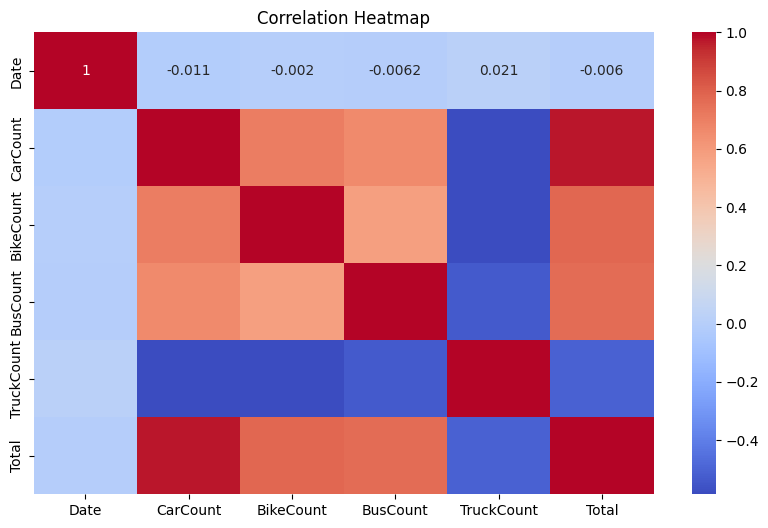

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum() 

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [14]:
df['Day of the week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [24]:
df.drop(['Date'],axis = 1 ,inplace = True)

In [25]:
df.head()

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,Tuesday,13,2,2,24,41,normal
1,Tuesday,14,1,1,36,52,normal
2,Tuesday,10,2,2,32,46,normal
3,Tuesday,10,2,2,36,50,normal
4,Tuesday,11,2,1,34,48,normal


In [47]:
df.drop(['Day of the week'],axis = 1 ,inplace = True)

In [48]:
df

,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,-1.159175,-0.881214,-0.857050,0.498124,-1.192287,3
1,-1.136604,-0.969218,-0.938226,1.617112,-0.995318,3
2,-1.226890,-0.881214,-0.857050,1.244116,-1.102756,3
3,-1.226890,-0.881214,-0.857050,1.617112,-1.031131,3
4,-1.204319,-0.881214,-0.938226,1.430614,-1.066943,3
...,...,...,...,...,...,...
6319,-0.865746,0.350849,0.035890,-0.247868,-0.655099,3
6320,0.172545,1.142889,-0.207639,0.777871,0.472996,1
6321,0.962549,0.086836,0.117066,0.871120,0.974371,1
6322,0.939977,0.526858,0.035890,0.777871,1.010184,1


In [27]:
lm = LabelEncoder()

In [28]:
df['Traffic Situation'] = lm.fit_transform(df['Traffic Situation'])

In [30]:
df['Traffic Situation'].unique()

array([3, 2, 0, 1])

In [32]:
SC = StandardScaler()

In [35]:
df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']] =SC.fit_transform(df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']])

In [36]:
df.head()

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,Tuesday,-1.159175,-0.881214,-0.857050,0.498124,-1.192287,3
1,Tuesday,-1.136604,-0.969218,-0.938226,1.617112,-0.995318,3
2,Tuesday,-1.226890,-0.881214,-0.857050,1.244116,-1.102756,3
3,Tuesday,-1.226890,-0.881214,-0.857050,1.617112,-1.031131,3
4,Tuesday,-1.204319,-0.881214,-0.938226,1.430614,-1.066943,3


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

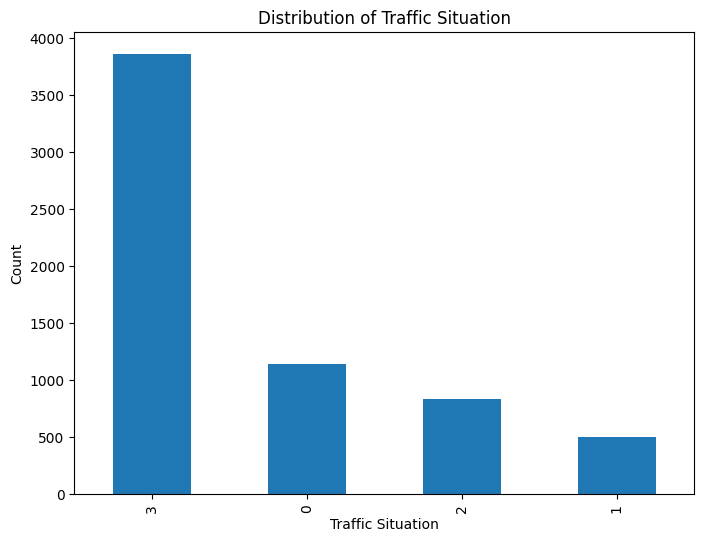

In [37]:
plt.figure(figsize=(8, 6))
df['Traffic Situation'].value_counts().plot(kind='bar')
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

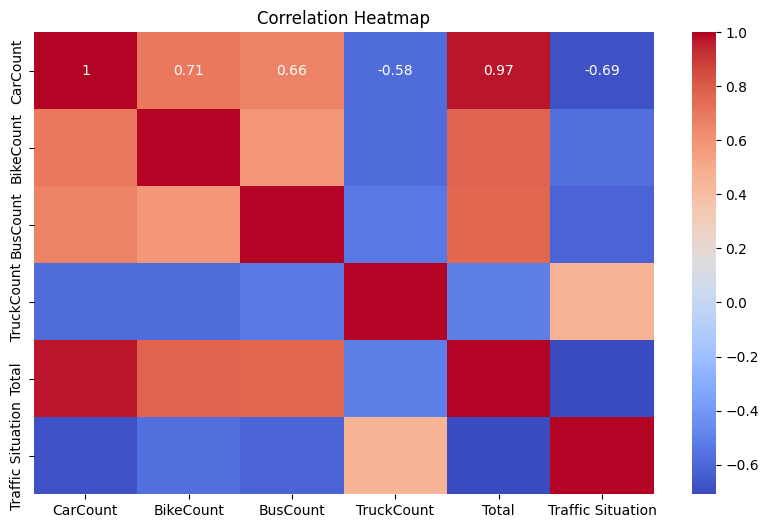

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [40]:
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [44]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [54]:
X

,CarCount,BikeCount,BusCount,TruckCount,Total
0,-1.159175,-0.881214,-0.857050,0.498124,-1.192287
1,-1.136604,-0.969218,-0.938226,1.617112,-0.995318
2,-1.226890,-0.881214,-0.857050,1.244116,-1.102756
3,-1.226890,-0.881214,-0.857050,1.617112,-1.031131
4,-1.204319,-0.881214,-0.938226,1.430614,-1.066943
...,...,...,...,...,...
6319,-0.865746,0.350849,0.035890,-0.247868,-0.655099
6320,0.172545,1.142889,-0.207639,0.777871,0.472996
6321,0.962549,0.086836,0.117066,0.871120,0.974371
6322,0.939977,0.526858,0.035890,0.777871,1.010184


In [52]:
X.drop(['Day of the week'],axis = 1 ,inplace = True)

In [55]:
y

0       3
1       3
2       3
3       3
4       3
       ..
6319    3
6320    1
6321    1
6322    1
6323    3
Name: Traffic Situation, Length: 6324, dtype: int32

In [56]:
X_train

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
1170,Sunday,0.172545,-0.353187,-0.694697,-0.061370,-0.100005
5437,Saturday,1.255979,1.582912,1.253536,-0.341117,1.529465
5458,Saturday,0.939977,-0.001169,0.279419,-0.900611,0.634152
2948,Thursday,1.526837,0.350849,0.035890,-0.714113,1.153434
1835,Sunday,-1.114032,-0.881214,-0.938226,1.710362,-0.941600
...,...,...,...,...,...,...
3772,Wednesday,1.729981,0.262845,0.685301,-1.273607,1.332496
5191,Thursday,-1.204319,-1.057223,-1.019403,-0.247868,-1.442975
5226,Thursday,0.285403,0.966880,0.117066,0.125128,0.472996
5390,Saturday,-1.023746,-0.617200,-0.938226,1.803611,-0.798349


In [57]:
X_train.drop(['Day of the week'],axis = 1 ,inplace = True)

In [61]:
X_test.drop(['Day of the week'],axis = 1 ,inplace = True)

In [62]:
X_test

,CarCount,BikeCount,BusCount,TruckCount,Total
3090,1.007692,1.142889,-0.775873,-0.993860,0.669965
198,-1.136604,-0.881214,-1.019403,1.523863,-1.013225
3934,-1.114032,-0.705205,-1.019403,-0.154619,-1.281819
1611,0.149974,-0.881214,0.360596,-0.807362,-0.135818
5435,0.082259,1.054885,0.198243,-0.434366,0.240214
...,...,...,...,...,...
2944,1.255979,0.438854,1.984123,-0.434366,1.439934
292,-1.114032,-1.057223,-1.019403,0.311626,-1.263912
1142,-0.211171,-0.353187,0.441772,0.498124,-0.046286
2641,-0.843174,-0.441191,-1.019403,1.337365,-0.726724


In [58]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate the model performance

In [63]:
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))
print("F1-score:", f1_score(y_test, rf_clf.predict(X_test), average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_clf.predict(X_test)))

Random Forest Classifier
Accuracy: 0.9003952569169961
F1-score: 0.9015115529238795
Confusion Matrix:
 [[220   0   0   0]
 [  0  81   0  21]
 [  0   0 115  34]
 [  0  23  48 723]]


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [67]:
BO = AdaBoostClassifier(n_estimators=100, random_state=42)

In [68]:
BO.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

### Evaluate the model performance

In [69]:
print("\nAdaBoost Classifier")
print("Accuracy:", accuracy_score(y_test, BO.predict(X_test)))
print("F1-score:", f1_score(y_test, BO.predict(X_test), average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, BO.predict(X_test)))


AdaBoost Classifier
Accuracy: 0.8023715415019763
F1-score: 0.7262793240459482
Confusion Matrix:
 [[220   0   0   0]
 [  0   8   0  94]
 [  0   0   0 149]
 [  1   6   0 787]]


In [70]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [71]:
print("\nGradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, gb.predict(X_test)))
print("F1-score:", f1_score(y_test, gb.predict(X_test), average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb.predict(X_test)))


Gradient Boosting Classifier
Accuracy: 0.9193675889328063
F1-score: 0.9204827169822687
Confusion Matrix:
 [[220   0   0   0]
 [  0  81   0  21]
 [  0   0 126  23]
 [  0  10  48 736]]


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [72]:
from sklearn.ensemble import StackingClassifier

### Define meta-learner (LogisticRegression)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
base_models = [
    ('lr', LogisticRegression()),

]



### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [75]:
clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5,

)
clf.fit(X_train, y_train)

StackingClassifier(cv=5, estimators=[('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [86]:
y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

In [87]:
print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

Accuracy: 0.86
F1-score: 0.86
Recall: 0.87
Precision: 0.85


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

Which features did you find most important for predicting churn, and why do you think they are significant?
There are many features and tools that helped me make predictions
- Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?
We did a lot of work, including deleting unimportant columns, visualizing data, and building Moodle
- Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
In general, these combined methods have better performance and interpretability advantages compared to individual models
-  - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?
Random Forest: A granularity capable of dealing with numerical and categorical variables.
Gradient Boosting: The best is powerful in dealing with non-linear relationships.
AdaBoost: Good performance but less than others.
-  - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?
Test accuracy: To measure the overall performance of models.
Analysis of strengths and weaknesses:
Discovering the weaknesses of models in dealing with certain types of data.
Identify the advantages of each model and use them to improve performance.
Results